# aSPEM Experiment : analysis




TODO: get inspired by https://github.com/laurentperrinet/bayesianchangepoint/blob/master/notebooks/C_test_hazardrate.ipynb

In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
fig_width = 15

from aSPEM import Analysis
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [4]:
#COLOR = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown', 'darkred','red']
list_sujet = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN']#,'YK']

nb_sujet = len(list_sujet)

COLOR = []
for n in range(nb_sujet) :
    COLOR.append((0+(1/nb_sujet)*n, 0, 0, 0.5))

In [5]:
BET = {}
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in list_sujet:
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            BET[liste[x][1]] = b

In [6]:
e = Analysis(observer='AM', mode='enregistrement')
Full = e.Full_list(modes_bcp=None)

# Scaling Data

In [7]:
file = os.path.join('parametre', 'Data_Scaling.pkl')
with open(file, 'rb') as fichier:
    new_data = pickle.load(fichier, encoding='latin1')

In [8]:
new_bet_full = new_data['new_bet_full']
new_bet_sujet = new_data['new_bet_sujet']
new_va_full = new_data['new_va_full']
new_va_sujet = new_data['new_va_sujet']

# Variation de h

In [9]:
file = os.path.join('parametre', 'list_h.pkl')
with open(file, 'rb') as fichier:
    list_h = pickle.load(fichier, encoding='latin1')

In [10]:
h_bet = list_h['h_bet_full']
h_va = list_h['h_va_full']

In [11]:
fig_width = 15
t_titre = 70
t_label = (30*4)/3

In [12]:
def regress(ax, p, data, c, minx=0, miny=0, maxx=1, maxy=1, t_label=t_label) :
    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    x_test = np.linspace(np.min(p), np.max(p), 100)
    fitLine = slope * x_test + intercept
    ax.plot(x_test, fitLine, c=c, linewidth=2)
    
    ax.text(maxx-((maxx-minx)/10), miny+((maxy-miny)/10), 'r = %0.3f\np_value = %0.3f'%(r_, p_value), fontsize=t_label/1.2, ha='right', color=c)
    return ax

In [13]:
def scatter_mean(bet, va, titre, maxx=0.55, maxy=0.25, ex=0.02, ey=0.01,
                 ellipse=False, color=False, mean='mean', fig_width=10) :
    
    if ellipse is True :
        from matplotlib.patches import Ellipse
    
    fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)), constrained_layout=True) #/(1.6180*1))

    m_bet, m_va = [], []
    for x, sujet in enumerate(list_sujet) :
        if ellipse is True :
            ells = Ellipse((np.mean(bet[sujet]), np.mean(va[sujet])), 2*np.std(bet[sujet]), 2*np.std(va[sujet]), 0,
                           color='k', alpha=0.2, clip_box=axs.bbox)
            axs.add_artist(ells)
        
        if mean=='mean' :
            mean_bet = np.mean(bet[sujet])
            mean_va = np.mean(va[sujet])
        elif mean=='mediane' :
            mean_bet = np.median(bet[sujet])
            mean_va = np.median(va[sujet])           
            
        if color is False :
            c = 'k'
        else :
            c = color[x]
            
        axs.errorbar(mean_bet, mean_va,
                    xerr=np.std(bet[sujet]), yerr=np.std(va[sujet]),
                    color=c, fmt='o', elinewidth=2, ms=10, alpha=0.6)
        
        m_bet.append(mean_bet)
        m_va.append(mean_va)

    axs.set_title(titre, fontsize=t_titre)
    axs.set_xlabel('h$_{bet}$', fontsize=t_label)
    axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
    axs.tick_params(axis='both', labelsize=t_label/1.8)
    
    axs.axis([-ex ,maxx+ex,-ey,maxy+ey])
    axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')

    regress(axs, m_bet, m_va, 'r', minx=-ex, miny=-ey, maxx=maxx+ex, maxy=(maxy+ey)/2)
    
    fig.tight_layout()
    plt.show()
    return fig, axs

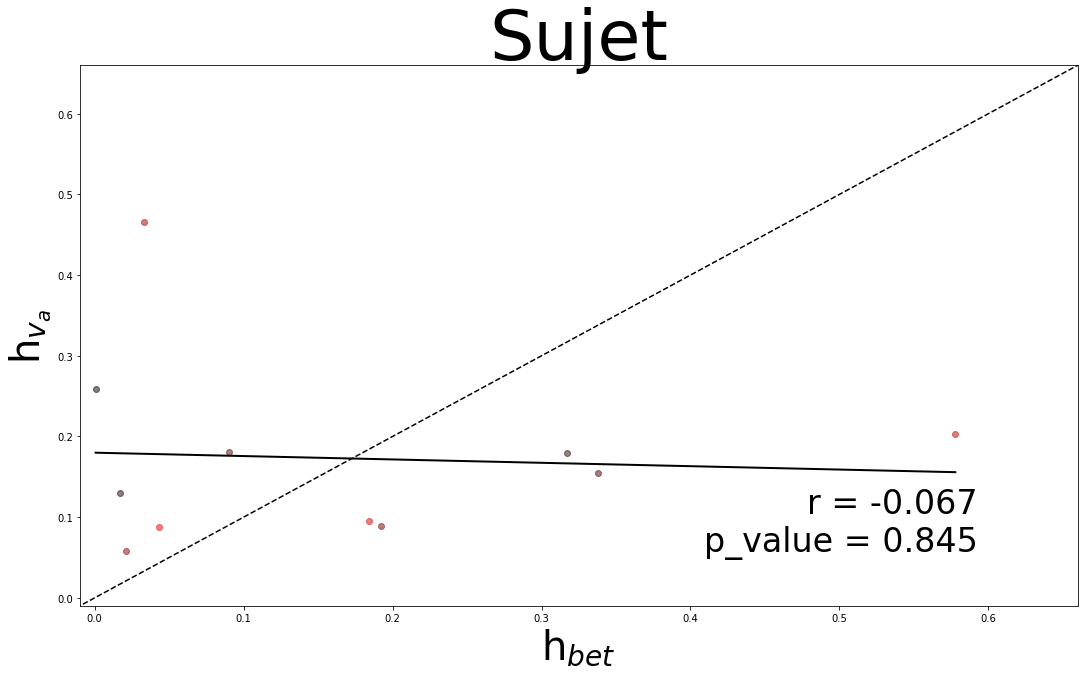

In [14]:
fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)/(1.6180*1)), constrained_layout=True)

full_h_bet_suj, full_h_va_suj = [], []

for x, sujet in enumerate(list_sujet):
    full_h_bet_suj.extend(h_bet['sujet'][sujet])
    full_h_va_suj.extend(h_va['sujet'][sujet])
    
    axs.scatter(h_bet['sujet'][sujet], h_va['sujet'][sujet],color=COLOR[x])

axs.set_title('Sujet', fontsize=t_titre)
axs.set_xlabel('h$_{bet}$', fontsize=t_label)
axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
axs.axis([-0.01 ,0.66,-0.01,0.66])

regress(axs, full_h_bet_suj, full_h_va_suj, 'k', minx=-0.01, miny=-0.01, maxx=0.66, maxy=0.66)

axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')
plt.show()

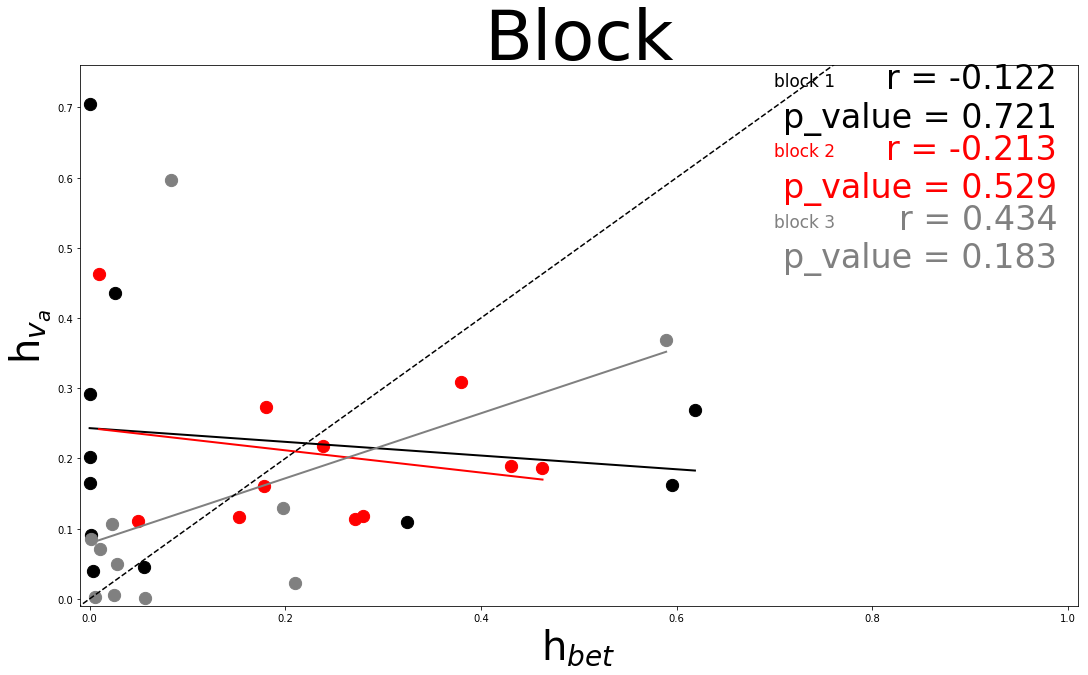

In [15]:
fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)/(1.6180*1)), constrained_layout=True)

c = ['k', 'r', 'grey']

h_bet_block = []
h_va_block = []

for x, sujet in enumerate(list_sujet):
    for a in range(len(h_bet['block'][sujet])) :
        axs.scatter(h_bet['block'][sujet][a], h_va['block'][sujet][a],color=c[a], s=150)
        if x==0:
            h_bet_block.append([])
            h_va_block.append([])
        h_bet_block[a].append(h_bet['block'][sujet][a])
        h_va_block[a].append(h_va['block'][sujet][a])

for a in range(len(h_bet_block)) :
    axs.text(0.7, 0.76-(0.1*(a)+((0.1*(a+3)-0.1*(a))/10)), 'block %s'%(a+1), color=c[a], fontsize=17)
    axs=regress(axs, h_bet_block[a], h_va_block[a], c[a], minx=-0.01, miny=0.7-(0.1*(a)), maxx=1.1, maxy=0.71-(0.1*(a+3)))

axs.set_title('Block', fontsize=t_titre)
axs.set_xlabel('h$_{bet}$', fontsize=t_label)
axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
axs.axis([-0.01 ,1.01,-0.01,0.76])

axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')
plt.show()

In [16]:
def scatter_mean_block(bet, va, titre, maxx=0.55, maxy=0.25, ex=0.02, ey=0.01,
                     ellipse=False, color=False, mean='mean', fig_width=10) :
    
    if ellipse is True :
        from matplotlib.patches import Ellipse
    
    fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)), constrained_layout=True)

    m_bet, m_va = [], []
    for x in range(len(bet)) :
        if ellipse is True :
            ells = Ellipse((np.mean(bet[x]), np.mean(va[x])), 2*np.std(bet[x]), 2*np.std(va[x]), 0,
                           color='k', alpha=0.2, clip_box=axs.bbox)
            axs.add_artist(ells)
        
        if mean=='mean' :
            mean_bet = np.mean(bet[x])
            mean_va = np.mean(va[x])
        elif mean=='mediane' :
            mean_bet = np.median(bet[x])
            mean_va = np.median(va[x])           
            
        if color is False :
            c = 'k'
        else :
            c = color[x]
            
        axs.errorbar(mean_bet, mean_va,
                    xerr=np.std(bet[x]), yerr=np.std(va[x]),
                    color=c, fmt='o', elinewidth=2, ms=10, alpha=0.6)
        
        m_bet.append(mean_bet)
        m_va.append(mean_va)

    axs.set_title(titre, fontsize=t_titre)
    axs.set_xlabel('h$_{bet}$', fontsize=t_label)
    axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
    axs.tick_params(axis='both', labelsize=t_label/1.8)
    
    axs.axis([-ex ,maxx+ex,-ey,maxy+ey])
    axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')

    regress(axs, m_bet, m_va, 'r', minx=-ex, miny=-ey, maxx=maxx+ex, maxy=(maxy+ey)/2)
    
    fig.tight_layout()
    plt.show()
    return fig, axs

Moyenne par block


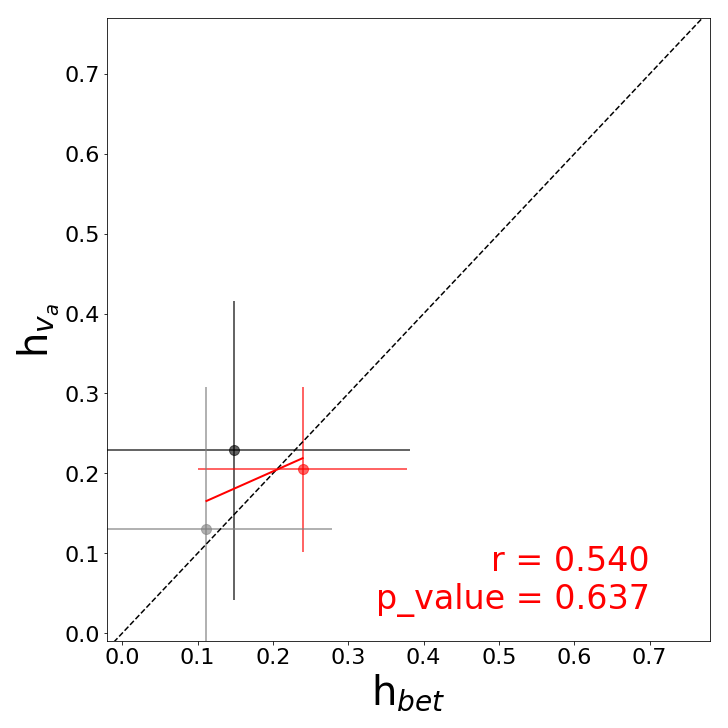

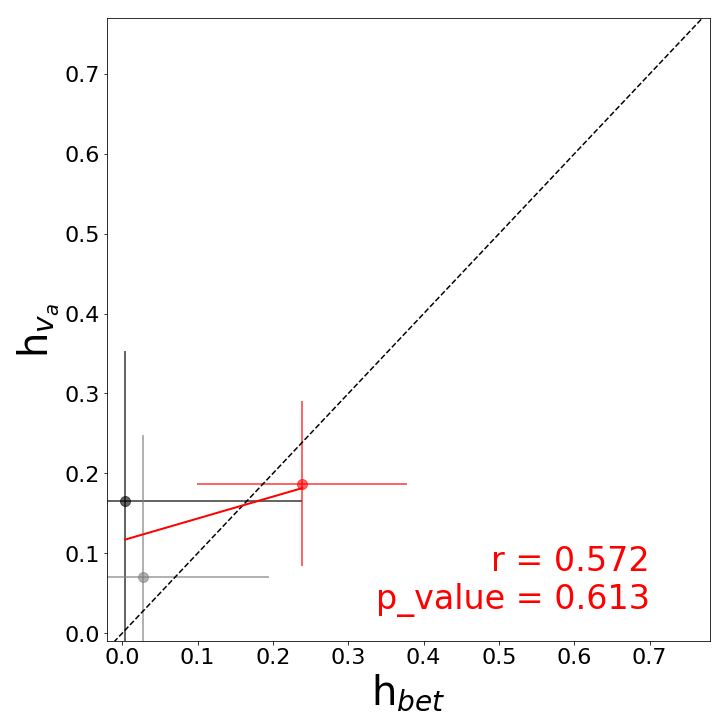

In [17]:
print('Moyenne par block')
fig, axs = scatter_mean_block(h_bet_block, h_va_block, '', maxx=0.76, maxy=0.76, color=c)
fig, axs = scatter_mean_block(h_bet_block, h_va_block, '', maxx=0.76, maxy=0.76, mean='mediane', color=c)

#fig1, axs1 = scatter_mean(h_bet_block, h_va_block, '', maxx=0.1, maxy=0.1, ellipse=True)

Moyenne par Sujet block


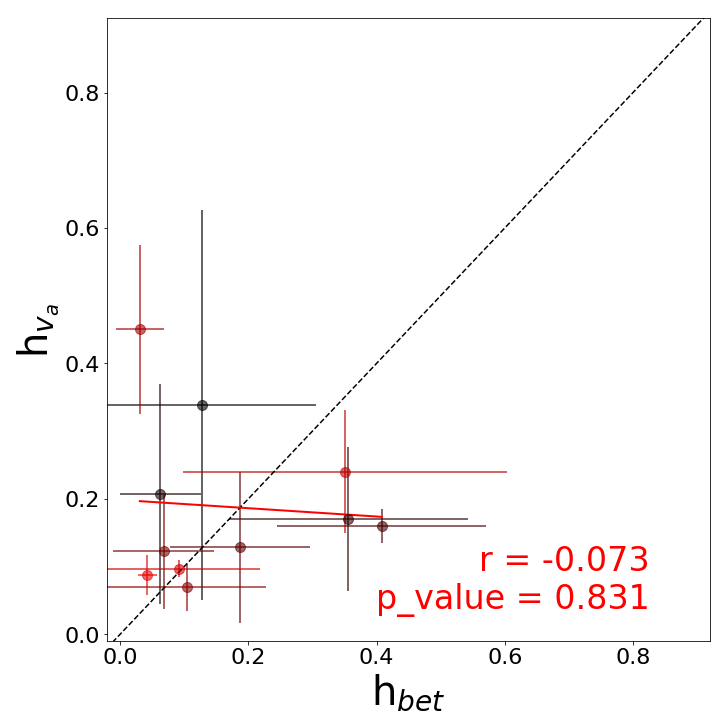

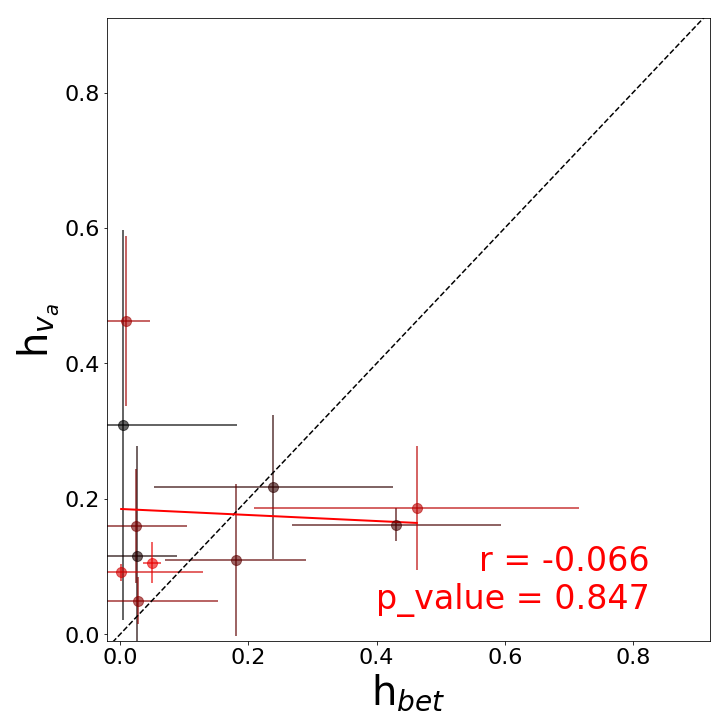

In [18]:
print('Moyenne par Sujet block')
fig, axs = scatter_mean(h_bet['block'], h_va['block'], '', maxx=0.9, maxy=0.9, color=COLOR)
#for ext in exts: fig.savefig('ms/figures/5_inter-individual_differences_fit' + ext, dpi=400)

fig, axs = scatter_mean(h_bet['block'], h_va['block'], '', maxx=0.9, maxy=0.9, mean='mediane', color=COLOR)

##fig1, axs1 = scatter_mean(h_bet['block'], h_va['block'], '', maxx=0.4, maxy=0.1, ellipse=True)

 * TODO: montrer le goodness of fit?
 * TODO: trois points => triangles / mettre le fit du h sujet (se trouve dedans?)
 * TODO: comparer avec un leaky-integrator

Moyenne par Sujet pause


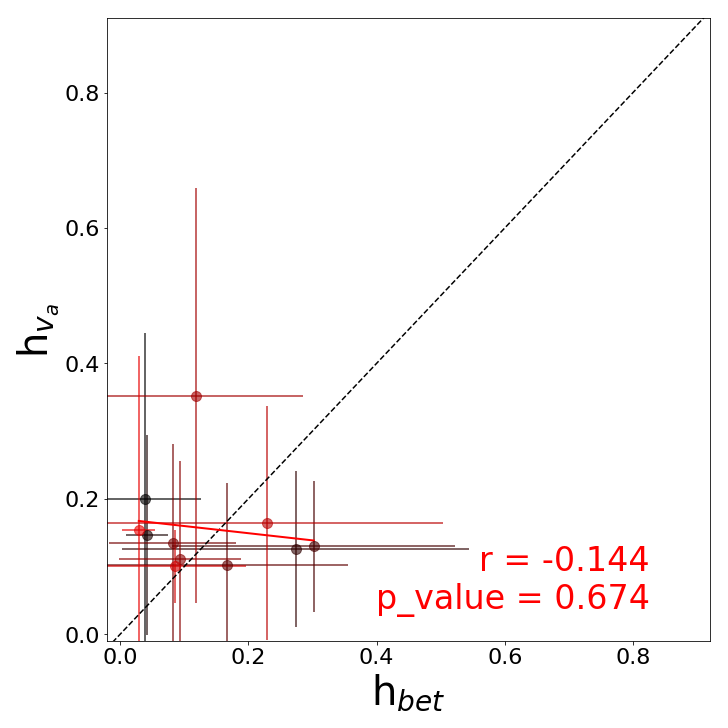

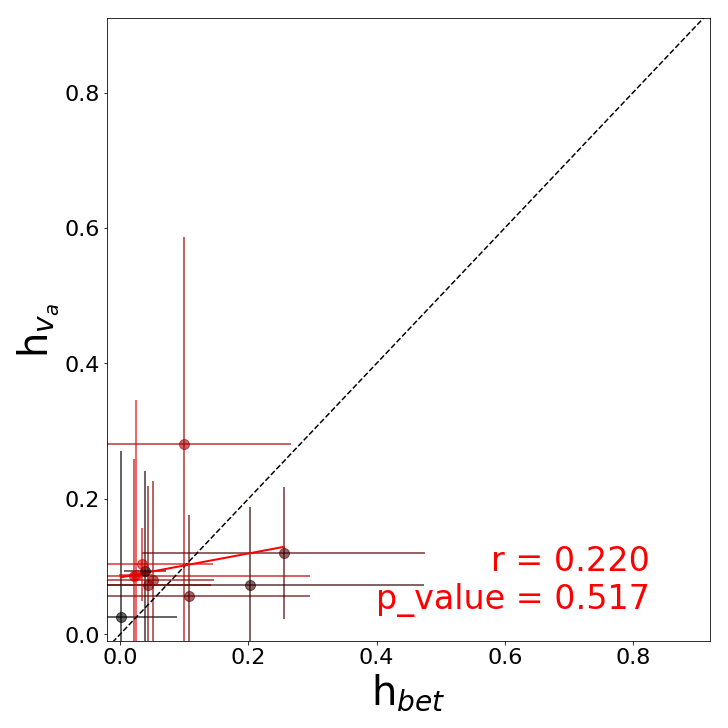

In [19]:
print('Moyenne par Sujet pause')
fig, axs = scatter_mean(h_bet['pause'], h_va['pause'], '',maxx=0.9, maxy=0.9, color=COLOR)
fig, axs = scatter_mean(h_bet['pause'], h_va['pause'], '',maxx=0.9, maxy=0.9, mean='mediane', color=COLOR)
##fig1, axs1 = scatter_mean(h_bet['pause'], h_va['pause'], '',maxx=0.4, maxy=0.4, ellipse=True)

## MI